In [1]:
# 0. Introdcution
    # It is time dependent.
    # seasonality trends, i.e. variations specific to a particular time frame

In [12]:
# 1. What makes Time Series Special
    # datatime64[ns] class which stores time information      

In [ ]:
# 2. Loading and Handling Time Series in Pandas

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [78]:
data = pd.read_csv('/home/svmdev/Desktop/AirPassengers.csv')
print(data.head())
print("---------------------------------------")
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
---------------------------------------
Month          object
#Passengers     int64
dtype: object


In [79]:
# parse_dates: column which contains the date-time information
# index_col: Index has to be variable depicting dateitme information. Here it is using "Month" column as index
# date_parser: This specifies a function which converts an input string into datetime variable. Pandas by default reads data in format 'YYYY-MM-DD HH:MM:SS'

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') # Changing the type from object to datetime
print(dateparse)
print(type(dateparse))
data = pd.read_csv('/home/svmdev/Desktop/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser = dateparse)
print(data.head())
print("---------------------------------------")
print(data.dtypes)

<function <lambda> at 0x7f73cd512400>
<class 'function'>
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
---------------------------------------
#Passengers    int64
dtype: object


In [20]:
data.index

# dtype='datetime64[ns]' confirms that it is a datetime object

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [22]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [25]:
# Few indexing technique 

# 1. Specify index as string
print(ts['1949-01-01'])

# 2. Import the datetime library and use 'datetime' function:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112
112


In [31]:
# Suppose we want all the data upto May 1949

# 1. Specify the entire range:
print(ts['1949-01-01':'1949-05-01'])

#2. Use ':' if one of the indices is at ends:
print(ts[:'1949-05-01'])

#  2 tings to note here:
# last index is also included unlike list 
# if indices are shuffled this won't work. Indices have to be sorted

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


In [27]:
print(ts['1949'])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64


In [32]:
'''
3. How to Check Stationary of a Time Series

A TS is stationary if its statistical properties such as mean, variance remain constant over time.
Assumption is if a TS has a particular behaviour over time, there is a very high probability that it will follow the
same in the future. 

To be stationary TS should have constant statistical property over time
1. constant mean
2. constant variance
3. an autocovariance that does not depend on time
'''

'\n3. How to Check Stationary of a Time Series\n\nA TS is stationary if its statistical properties such as mean, variance remain constant over time.\nAssumption is if a TS has a particular behaviour over time, there is a very high probability that it will follow the\nsame in the future. \n\nTo be stationary TS should have constant statistical property over time\n1. constant mean\n2. constant variance\n3. an autocovariance that does not depend on time\n'

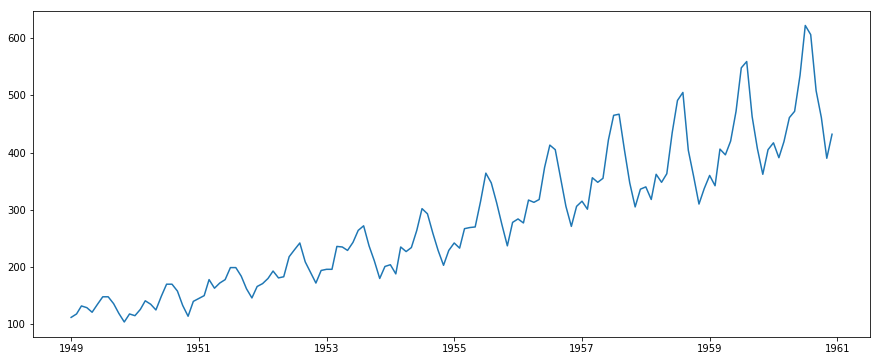

In [33]:
plt.plot(ts)

In [34]:
'''
We can check stationarity using the following:

1. Plotting Rolling Statitics:
    Drawing the moving average or variance
2. Dickey-Fuller Test:
    Here the null-hypothesis is that the TS is non-stationary.
    The test result comprise of a Test Statistics and some Critical Values for different confidence levels.
    If 'Test Statistics' < 'Critical Values' we reject the null hypothesis
'''

"\nWe can check stationarity using the following:\n\n1. Plotting Rolling Statitics:\n    Drawing the moving average or variance\n2. Dickey-Fuller Test:\n    Here the null-hypothesis is that the TS is non-stationary.\n    The test result comprise of a Test Statistics and some Critical Values for different confidence levels.\n    If 'Test Statistics' < 'Critical Values' we reject the null hypothesis\n"

In [48]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

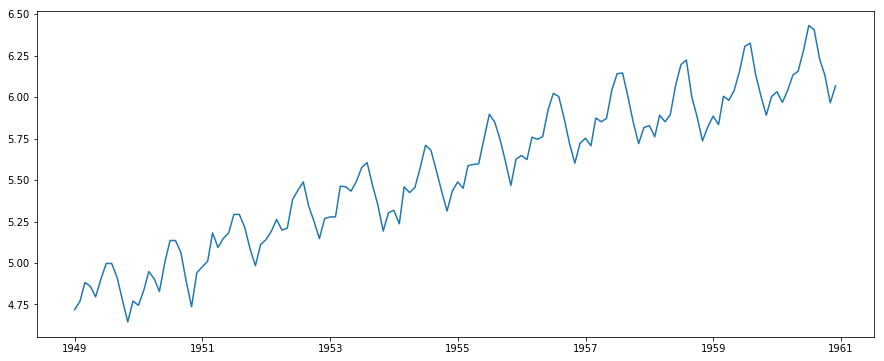

In [37]:
'''
4. How to make a Time Series Stationary

There are 2 major reasons behind non-stationaruty of a TS:

1. Trend : varying mean over time, ex: on an average, the number of passengers eas growing over time.
2. Seasonlity : variations at specific time-frames, ex: people might have a tendency to buy cars in a 
   particular month because of pay of increament. 
'''


'''
Estimating and Eliminating Trend

Transformation could reduce the trend because it penalizes higher values more than smaller values.
Ex. log, square root, cube root, etc

Estimating and removing the trend:
1. Aggregation - taking average for a time period like monthly/weekly averages
2. Smoothing - taking rolling averages
3. Polynomial Fitting - fit a regression model
'''

ts_log = np.log(ts)
plt.plot(ts_log)


/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys


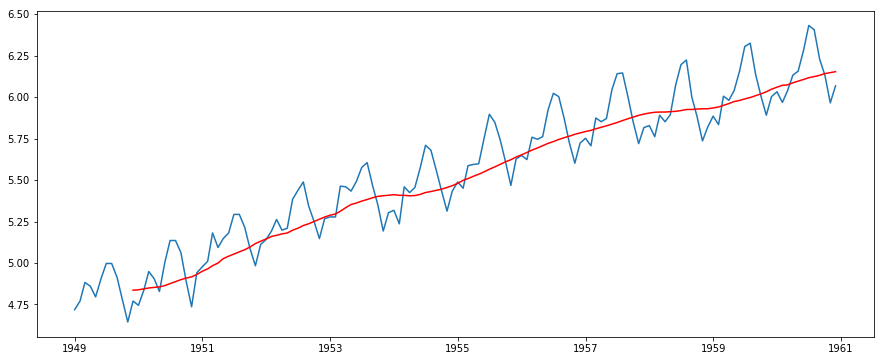

In [38]:
'''
Moving average

Take average over the past 1 year, i.e. last 12 values
'''

moving_avg = pd.rolling_mean(ts_log, 12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [40]:
'''
Substract original values with the rolling average and see the plot
'''

ts_log_moving_avg_diff = ts_log - moving_avg
print(ts_log_moving_avg_diff.head())

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64


/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


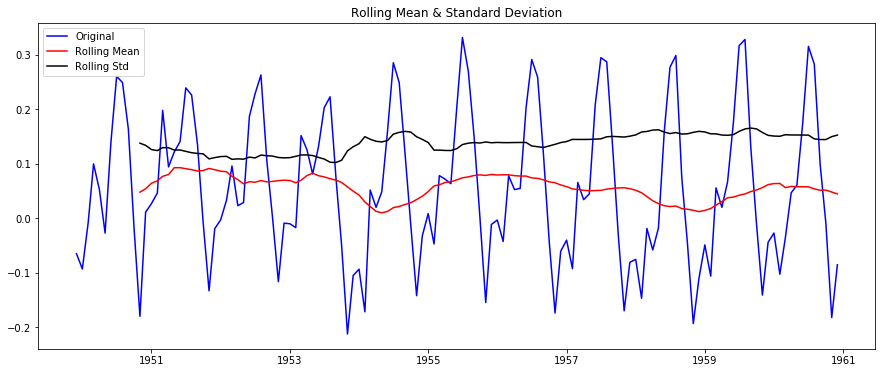

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [49]:
'''
Drop the NaN values and check the plots to test stationarity
'''
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

'''
Test Statistics is less than 5% Crtical value so we can say that we are 95% confident that this is a stationary series
'''

/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
Name: #Passengers, dtype: float64


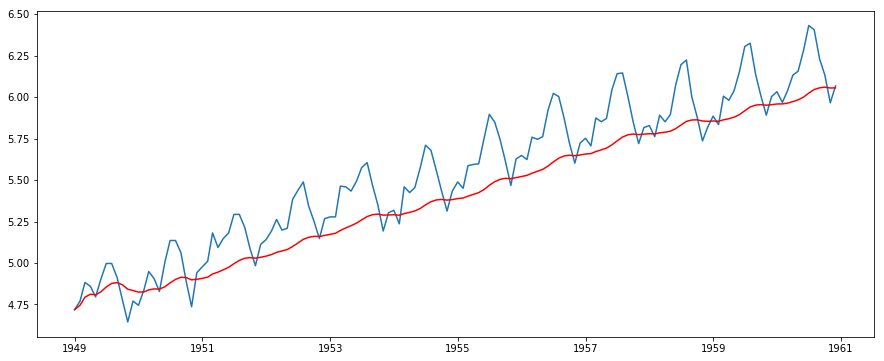

In [52]:
expwighted_avg = pd.ewma(ts_log, halflife=12) # ewma : exponentially weighted moving average
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
print(expwighted_avg.head())

/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


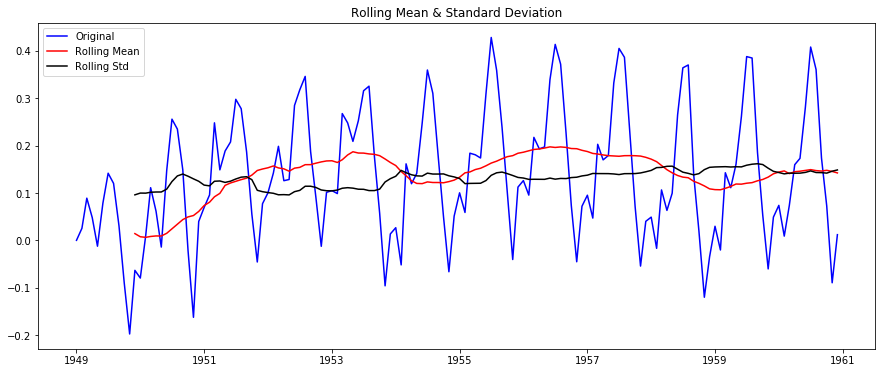

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [51]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64
Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
Name: #Passengers, dtype: float64


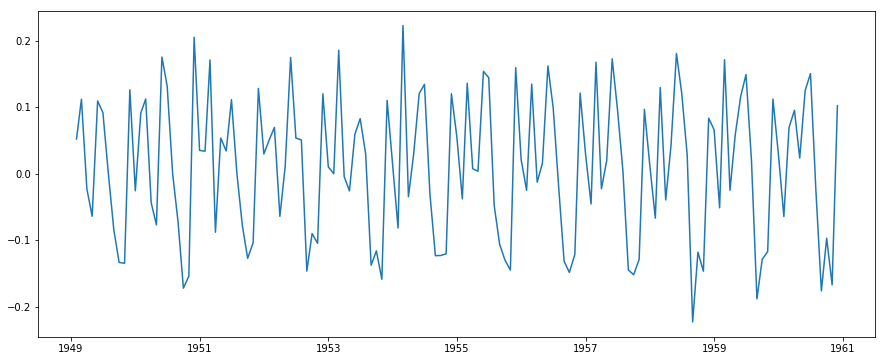

In [55]:
'''
Eliminating Trend and Seasonality

Two ways of removing trends and seasonality :
1. Differencing : taking the difference with a particular time lag
2. Decomposition : modeling both trend and seasonality and removing them from the model
'''

'''
Differencing
In this technique we take the difference of the observation at a particular instant with that of the previous instance
'''

ts_log_diff = ts_log - ts_log.shift()
print(ts_log.head())
print(ts_log.shift().head())

plt.plot(ts_log_diff)

/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


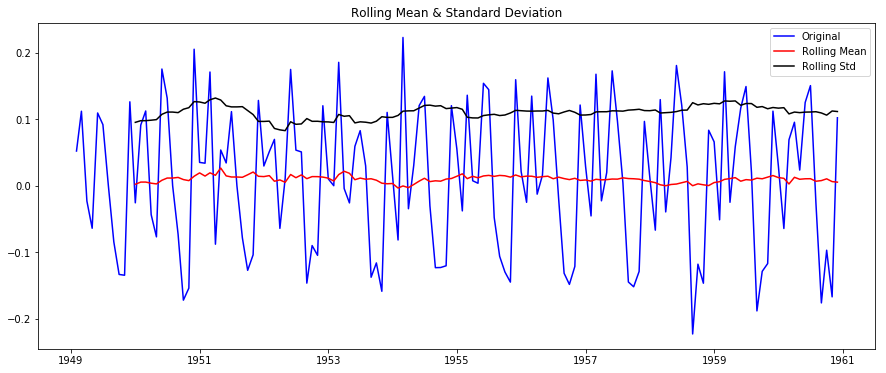

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [56]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

'''
Test Static is less than the 10% critical value, thus TS is stationary with 90% confidence
'''

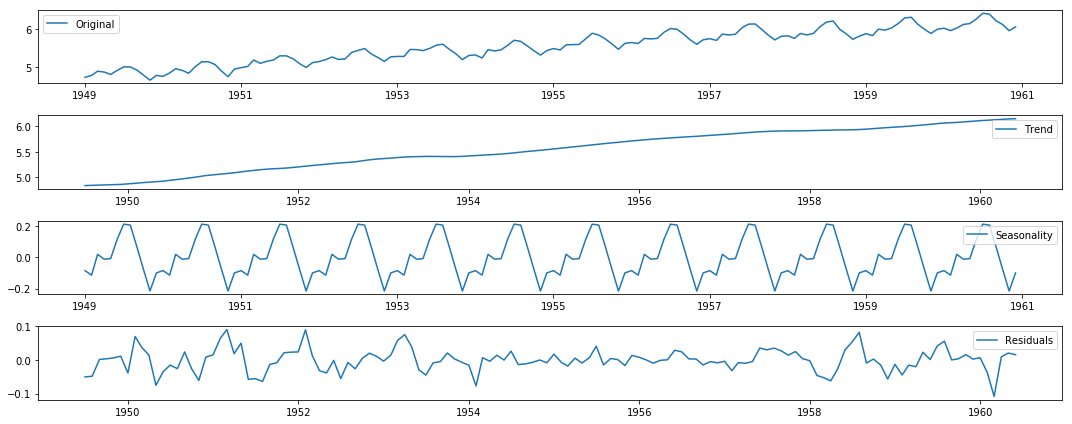

In [58]:
'''
Decomposing

Here both trend and seasonality are modeled seperately and remaining part of the series is returned.
'''

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


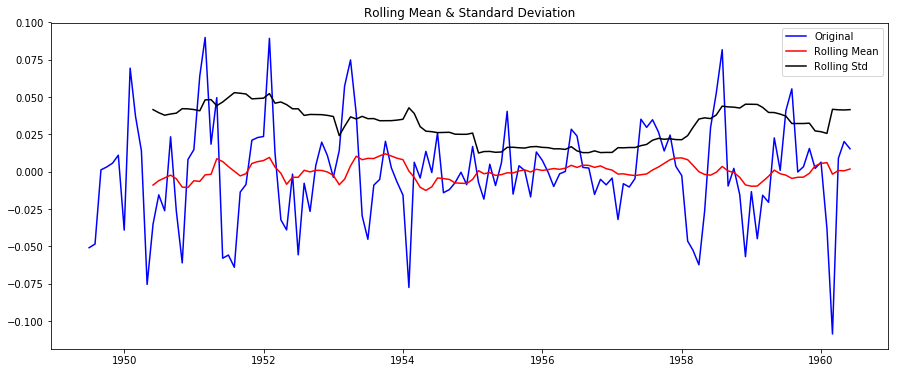

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [59]:
'''
Checking stationarity of residual
'''

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

'''
Test static is less than 1% critical value, so we arte close to stationarity
'''

In [11]:
# 5. Forecasting a Time Series

In [62]:
'''
1. Autocorrelation Function (ACF): It is a measure of correlation between TS and a lagged version of itself. So at lag
   of 5, ACF would compare the series at time instant 't1'..'t2' with series at instat 't1-5'..'t2-5'.
   
2. Partial Autocorrelation Function (PACF): It is a measure of correlation between TS and a lagged version of itself
   but after eliminating the variations already explained by the inervening comparisions. Ex. at lag 5, iit will check 
   correlation but remove the effects already explained by lags 1 to 4.
'''

# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

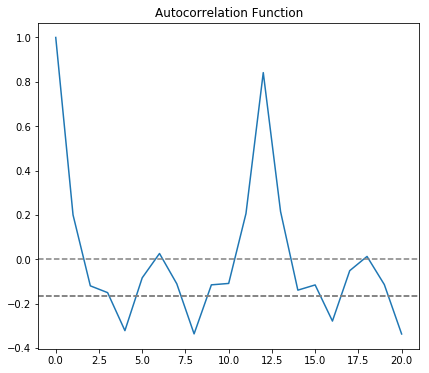

In [63]:
# Plot ACF:
plt.subplot(121)

plt.plot(lag_acf)

plt.axhline(y=0, linestyle='--', color='gray')

plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')

plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')

plt.title('Autocorrelation Function')

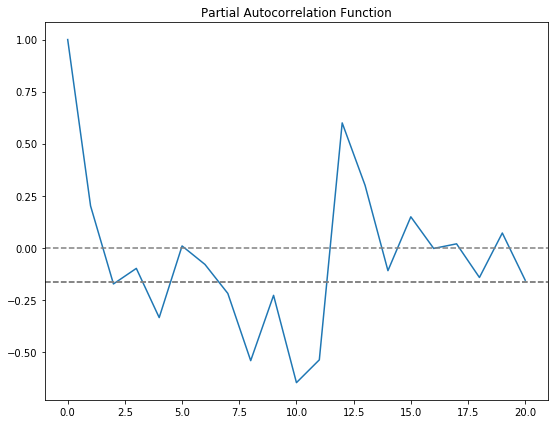

In [64]:
# plot PACF
plt.subplot(122)

plt.plot(lag_pacf)

plt.axhline(y=0, linestyle='--', color='gray')

plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')

plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')

plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [67]:
#  Loading ARIMA : Auto-Regressive Integrated Moving Averages

from statsmodels.tsa.arima_model import ARIMA


/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

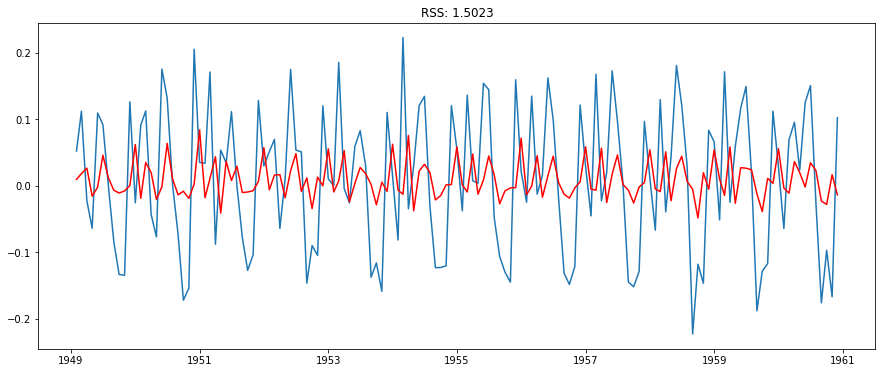

In [69]:
'''
AR Model (p, d, q)

p = 2
d = 1
q = 0

p - where PACF crosses the upper confidence for the first time, in our case it is 2
q - where ACF crosses the upper confidence for the first time, in our case it is 2

'''

model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-ts_log_diff)**2))

/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.4721')

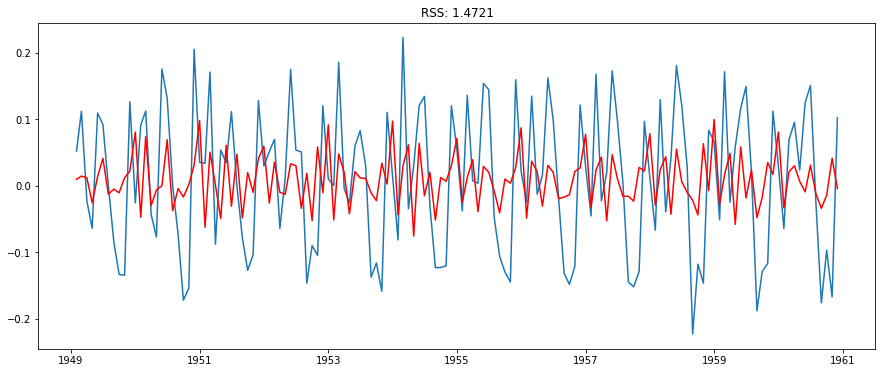

In [70]:
'''
MA Model
'''
model = ARIMA(ts_log, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-ts_log_diff)**2))

/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.0292')

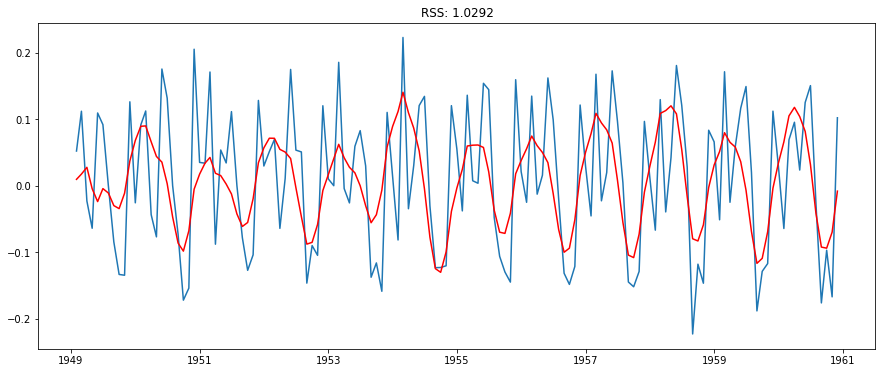

In [71]:
'''
Combined Model
'''

model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [72]:
'''
Taking it back to original scale
'''

# Store the predicted results as a sepearate series and observe it

predictions_ARIME_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIME_diff)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005227
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058869
1958-12-01   -0.002662
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036074
1959-

In [74]:
'''
To convert the differencing to log scale is to add these differences consecutively to the base number.
First determine the cumulative sum at index and then add it to the base number
'''

predictions_ARIMA_diff_cumsum = predictions_ARIME_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220143
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321788
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069124
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115297
1951-03-01    0.157858
1951-04-01    0.176606
1951-05-01    0.191865
1951-06-01    0.194355
1951-07-01    0.181947
                ...   
1958-07-01    1.166557
1958-08-01    1.150092
1958-09-01    1.070250
1958-10-01    0.987107
1958-11-01    0.928238
1958-12-01    0.925575
1959-01-01    0.956774
1959-02-01    1.008219
1959-03-01    1.088026
1959-04-01    1.153360
1959-05-01    1.211550
1959-06-01    1.247625
1959-

In [75]:
# Creating a series with all values as base number and add the difference to it
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

/home/svmdev/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE: 90.1044')

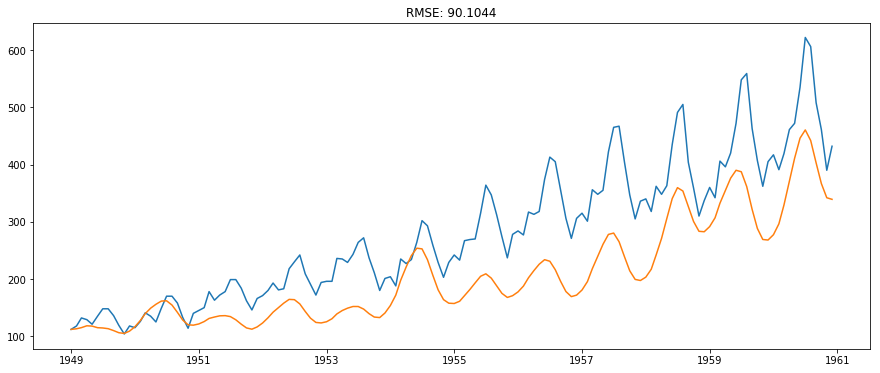

In [76]:
#  Last step is to take the exponent and compare with the original

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f' %np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))